In [ ]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#load cleaned_passenger_satisfaction csv file
data = pd.read_csv("cleaned_passenger_satisfaction.csv",index_col=0)
data.head(3)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,1,0,0,0,0,0


In [ ]:
# Logistic regression after scaling
#Define X and y
X = data.drop("satisfaction", axis=1)
y = data["satisfaction"]

# Train-Test Split
# stratify=y ensures both classes are proportionally represented in both train and test sets.to preserve the same class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling (Important for Logistic Regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the Model

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10632  1144]
 [ 1426  7579]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [5]:
#trying logistic regression with smote
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

#  Train‑test split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE: ", y_train_res.value_counts().to_dict())

#  Scale features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)  # fit on resampled train
X_test_scaled      = scaler.transform(X_test)          # transform test

#  Retrain logistic regression
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_res_scaled, y_train_res)

#  Evaluate on the untouched test set
y_pred_smote = model_smote.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE: {0: 47103, 1: 36020}
After SMOTE:  {1: 47103, 0: 47103}
Confusion Matrix:
 [[10294  1482]
 [ 1275  7730]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     11776
           1       0.84      0.86      0.85      9005

    accuracy                           0.87     20781
   macro avg       0.86      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781



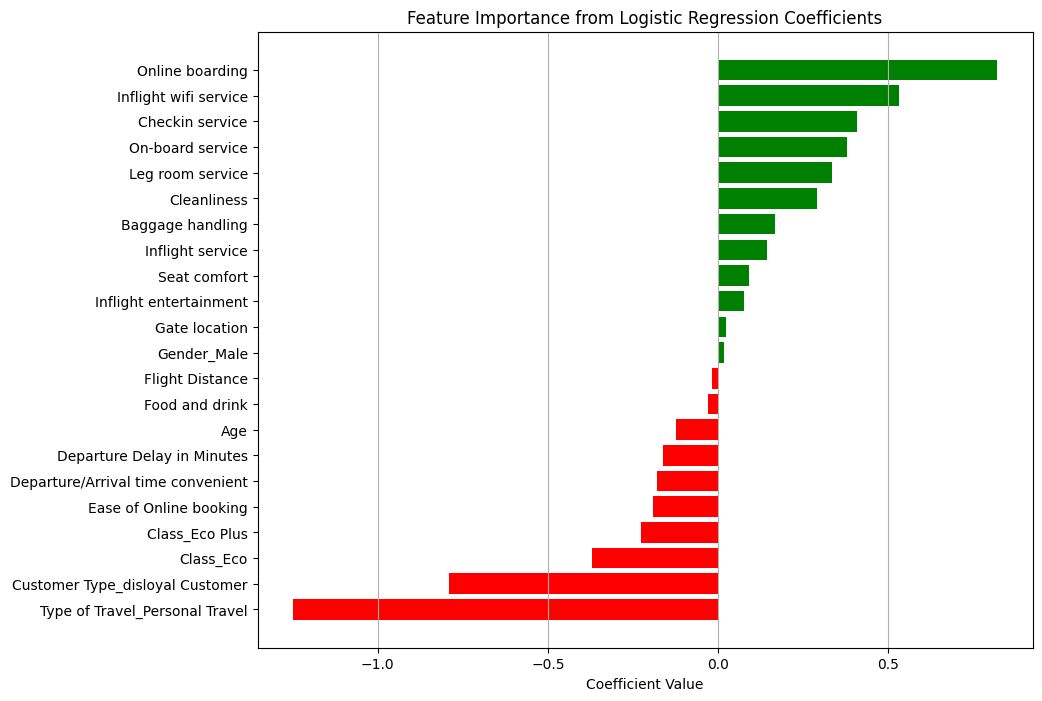

In [ ]:
# Feature importance from logistic resression coefficients
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your coefficients and feature names:
coefficients = model.coef_[0]          # LogisticRegression coefficients
feature_names = X.columns.tolist()     # Feature names from your dataset

# Create DataFrame with raw coefficients (no abs)
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by coefficient to show negative on bottom and positive on top
feat_imp = feat_imp.sort_values(by='Coefficient')

# Plot
plt.figure(figsize=(10, 8))
colors = ['red' if c < 0 else 'green' for c in feat_imp['Coefficient']]  # red for negative, green for positive

plt.barh(feat_imp['Feature'], feat_imp['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

What You Can Infer from above feature importance from logistic regression  
1. Strong Positive Influence (Green bars, right side):
These features increase the probability of a passenger being satisfied:

Online boarding

Inflight wifi service

Checkin service

On-board service

Leg room service

Improving or ensuring quality in these areas strongly contributes to passenger satisfaction.

2. Strong Negative Influence (Red bars, left side):
These features decrease the probability of a passenger being satisfied:

Type of Travel: Personal Travel

Customer Type: Disloyal Customer

Class: Eco / Eco Plus

Departure Delay in Minutes

Ease of Online Booking

Passengers traveling for personal reasons, flying economy, or those who are disloyal are less likely to be satisfied. These are risk indicators.

3. Less Important Features:
Features near zero coefficient value contribute little to no prediction power:

Gender

Gate location

Flight Distance

Food and drink

These may not be impactful in satisfaction decisions.



In [9]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define X and y
X = data.drop("satisfaction", axis=1)
y = data["satisfaction"]

# Step 2: Train-Test Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict and Evaluate
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[11502   274]
 [  505  8500]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Key Insights:
Overall Accuracy: 96% – Excellent.

Class 0 (Not Satisfied):

Precision: 0.96 → 96% of predicted "Not Satisfied" were correct.

Recall: 0.98 → 98% of actual "Not Satisfied" were correctly predicted.

Class 1 (Satisfied):

Precision: 0.97

Recall: 0.94 → Slightly lower than for Class 0, but still very strong.

Balanced Performance: Macro and weighted averages are consistent, showing no major class bias.

So there is no need of Resampling techniques

C:\Users\priya\AppData\Local\Temp\ipykernel_7384\456277582.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


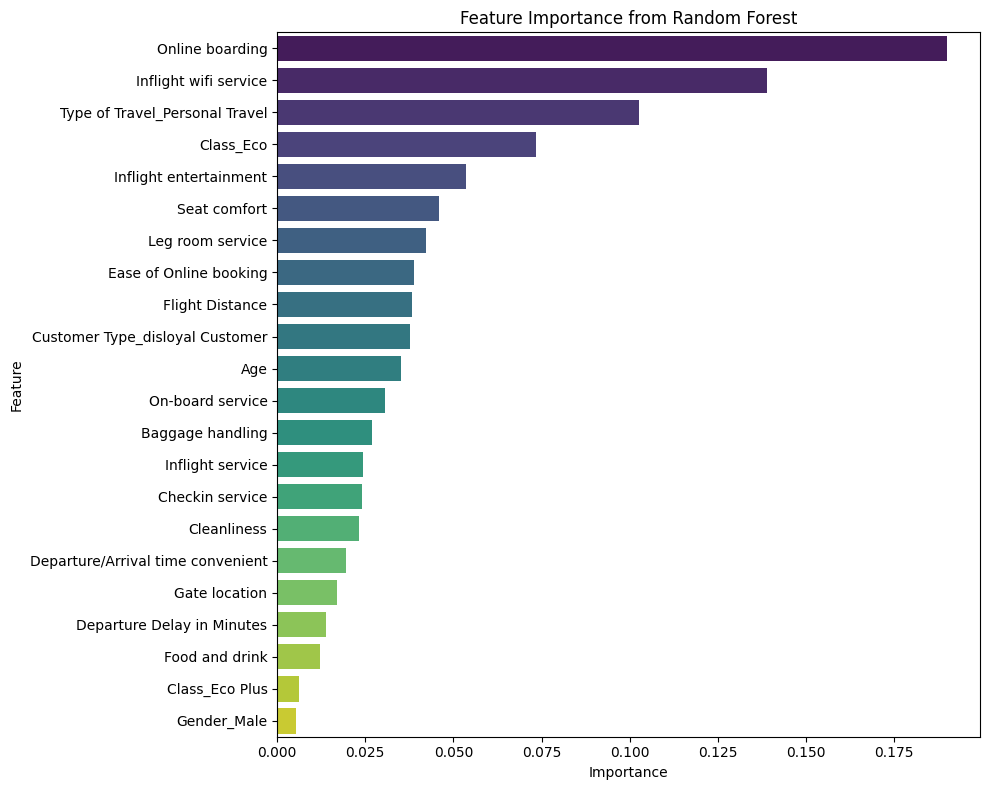

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importance values
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


Key Observations from the Plot
Top Predictors:

Online boarding, Inflight wifi service, and Type of Travel_Personal Travel are the most important features.

These features have the highest impact on model predictions and may hold valuable insights for business or customer experience strategies.

Moderate Predictors:

Class_Eco, Inflight entertainment, Seat comfort, etc., have a meaningful but lesser influence.

Low Impact Features:

Gender_Male, Class_Eco Plus, Food and drink, and Departure Delay in Minutes have very low importance.

These may be candidates for feature removal in simpler models or used in dimensionality reduction.

Confusion Matrix:
 [[11241   535]
 [  699  8306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



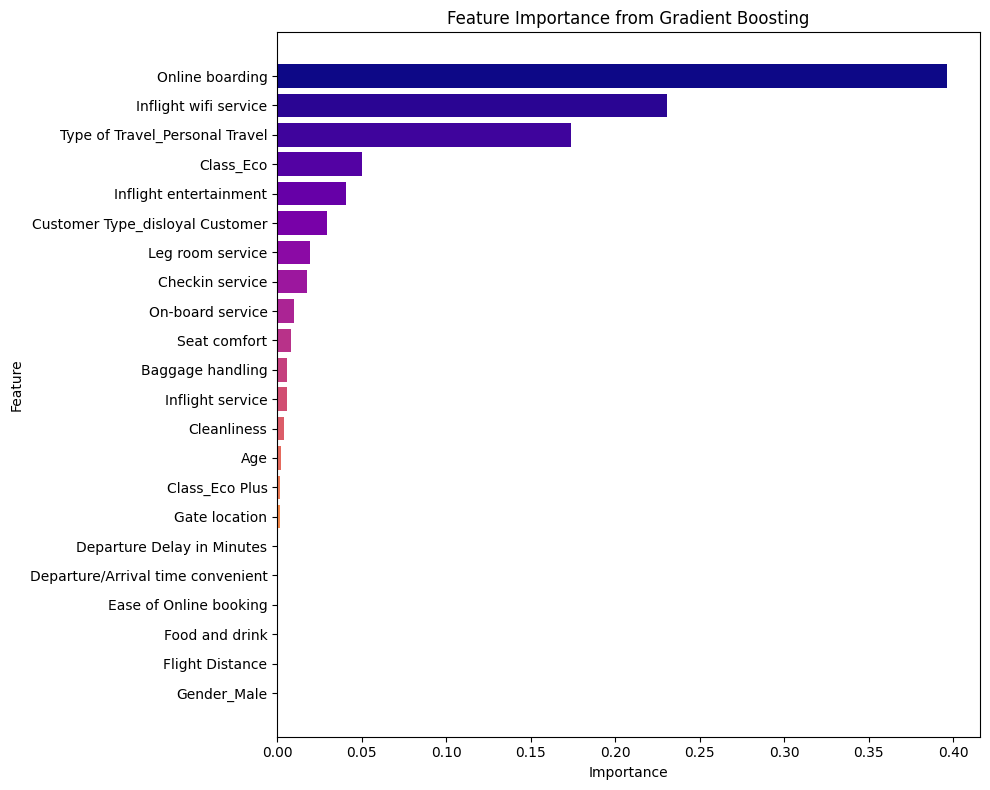

In [ ]:
#gradient boosting classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you already have X and y ready
# X = your feature dataframe
# y = your target column (e.g., satisfaction)

# 1. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = gb_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Plot Feature Importance
importances = gb_model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color=plt.cm.plasma(np.linspace(0, 1, len(feat_imp_df))))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Gradient Boosting')
plt.tight_layout()
plt.show()

Confusion Matrix:
[[11485   291]
 [  466  8539]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



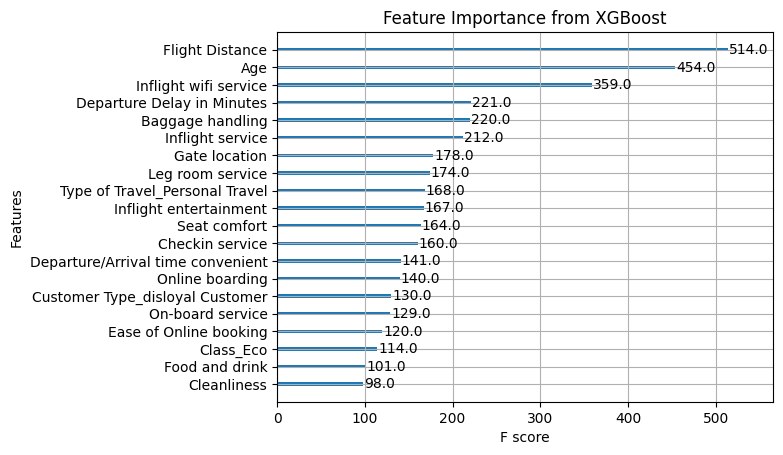

In [13]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# Split the data (with stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
       eval_metric='logloss',     # needed for recent xgboost versions
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance plot (optional)
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=20)
plt.title("Feature Importance from XGBoost")
plt.show()

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:
 {'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}

Confusion Matrix:
[[11518   258]
 [  491  8514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



C:\Users\priya\AppData\Local\Temp\ipykernel_7384\1267991694.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


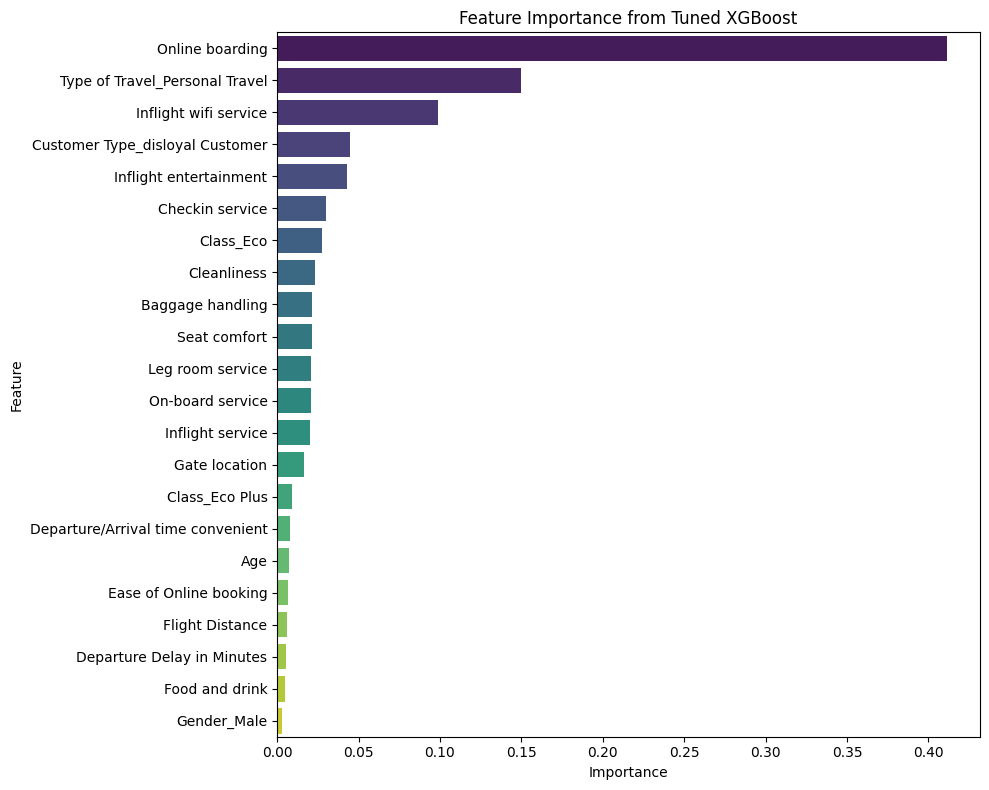

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your preprocessed dataset (replace X, y with your actual features and labels)
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Define the model
xgb_clf = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# 4. Define parameter grid for tuning
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# 5. Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    scoring='accuracy',  # You can use 'f1', 'roc_auc' if preferred
    n_iter=25,  # Number of random combinations to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 6. Fit the model
random_search.fit(X_train, y_train)

# 7. Best model
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# 8. Evaluate
y_pred = best_model.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Feature importance plot
importances = best_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Feature Importance from Tuned XGBoost')
plt.tight_layout()
plt.show()


Hyperparameter Tuning Documentation
As part of the model optimization process, hyperparameter tuning was performed on the XGBoost classifier using GridSearchCV. The objective was to identify whether performance improvements could be achieved over the default model configuration.

Observations:
The default XGBoost model already delivered high performance, with an overall accuracy of 96%, and strong precision and recall scores across both classes.

After tuning key hyperparameters (e.g., n_estimators, max_depth, learning_rate, subsample, colsample_bytree, etc.), no significant improvement was observed in key evaluation metrics:

Accuracy remained at 96%

Recall and precision for both classes showed only marginal changes

 Decision:
Given that The default model already performs exceptionally well

Hyperparameter tuning increased training time and complexity

There were no meaningful improvements in classification metrics

So have decided to proceed with the default XGBoost configuration. This decision ensures a balance between model performance and computational efficiency, and is supported by the principle of simplicity without sacrificing accuracy.



In [ ]:
#logging in all the models into mlflow
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Use your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return acc, cm, cr

# Start MLflow experiment
mlflow.set_experiment("Customer_Satisfaction_Models")

with mlflow.start_run(run_name="Logistic Regression"):
    model = LogisticRegression(max_iter=1000)
    acc, cm, cr = evaluate_model(model, "Logistic Regression")
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "logistic_regression_model")

with mlflow.start_run(run_name="Random Forest"):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    acc, cm, cr = evaluate_model(model, "Random Forest")
    mlflow.log_param("model", "Random Forest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "random_forest_model")

with mlflow.start_run(run_name="Gradient Boosting"):
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    acc, cm, cr = evaluate_model(model, "Gradient Boosting")
    mlflow.log_param("model", "Gradient Boosting")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "gradient_boosting_model")

with mlflow.start_run(run_name="XGBoost"):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    acc, cm, cr = evaluate_model(model, "XGBoost")
    mlflow.log_param("model", "XGBoost")
    mlflow.log_metric("accuracy", acc)
    mlflow.xgboost.log_model(model, "xgboost_model")

2025/05/15 18:20:25 INFO mlflow.tracking.fluent: Experiment with name 'Customer_Satisfaction_Models' does not exist. Creating a new experiment.
C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.8690
Confusion Matrix:
 [[15791  1764]
 [ 2321 11296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     17555
           1       0.86      0.83      0.85     13617

    accuracy                           0.87     31172
   macro avg       0.87      0.86      0.87     31172
weighted avg       0.87      0.87      0.87     31172



2025/05/15 18:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Random Forest Accuracy: 0.9622
Confusion Matrix:
 [[17202   353]
 [  825 12792]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



2025/05/15 18:21:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Gradient Boosting Accuracy: 0.9400
Confusion Matrix:
 [[16840   715]
 [ 1155 12462]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     17555
           1       0.95      0.92      0.93     13617

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



2025/05/15 18:21:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [18:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9613
Confusion Matrix:
 [[17152   403]
 [  802 12815]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17555
           1       0.97      0.94      0.96     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [18:21:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/05/15 18:21:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
#register the XGBoost_Default_Model to be used for prediction
import mlflow
import mlflow.xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

with mlflow.start_run(run_name="XGB_Default"):
    mlflow.xgboost.log_model(model, artifact_path="model", registered_model_name="XGBoost_Default_Model")
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("random_state", 42)
    mlflow.log_param("learning_rate", model.learning_rate)      # logs 0.3 by default
    mlflow.log_param("n_estimators", model.n_estimators)        # logs 100 by default
    mlflow.log_metric("accuracy", accuracy)

C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [19:02:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\priya\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [19:02:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/05/15 19:03:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'XGBoost_Defaul